In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd


style.use(['fivethirtyeight'])

In [8]:
# Import
speech_df = pd.read_csv('../input/inaugural_speeches.csv', sep=',')

In [17]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

speech_df["Speech Length"] = speech_df["text_clean"].apply(lambda w : len(w))

speech_df["Speech Year"] = pd.DatetimeIndex(speech_df["Date"]).year

<ipython-input-17-889dc81ab5d7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')


In [19]:
speech_df.head()

,Name,Inaugural Address,Date,text,text_clean,Speech Length,Speech Year
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1789
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,1793
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,1797
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...,friends and fellow citizens called upon to u...,10144,1801
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",proceeding fellow citizens to that qualifica...,12902,1805


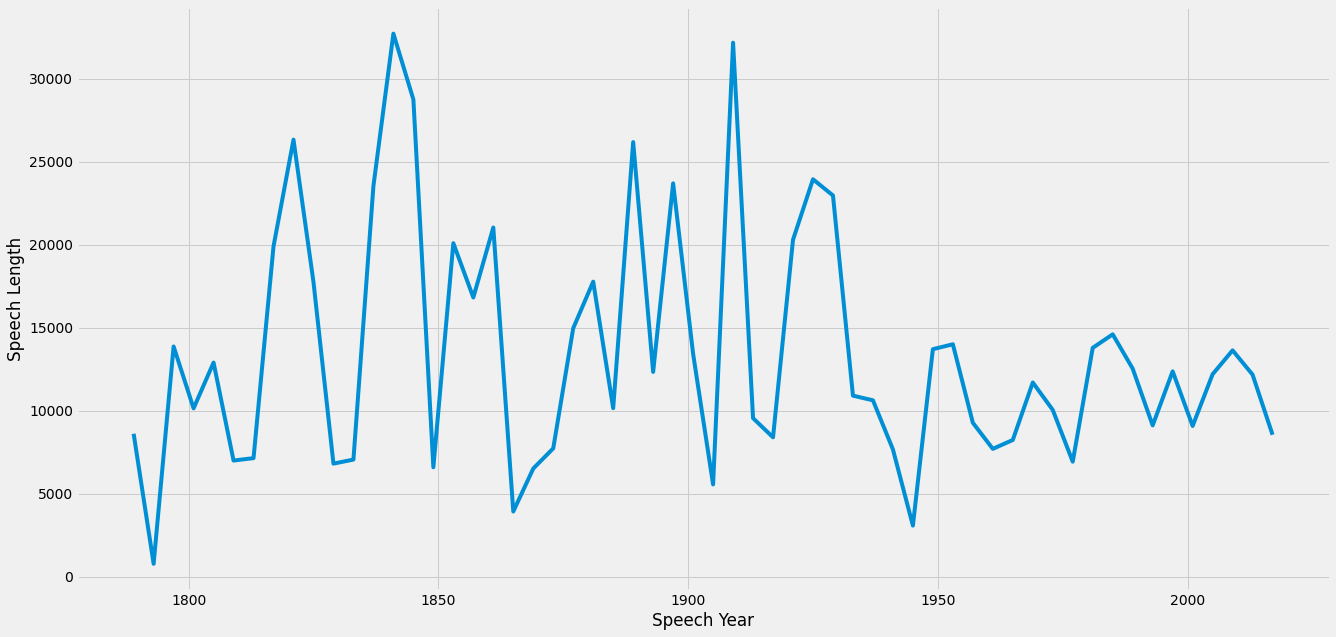

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(y='Speech Length', x='Speech Year', data=speech_df)
plt.show()

In [12]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
tv_df.head()

,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_better,TFIDF_change,TFIDF_citizens,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,0.000000,0.000000,0.000000,0.229644,...,0.000000,0.045929,0.0,0.136012,0.203593,0.000000,0.060755,0.000000,0.045929,0.052694
1,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.179712,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,0.026112,0.060460,0.000000,0.106072,...,0.032030,0.021214,0.0,0.062823,0.070529,0.024339,0.000000,0.000000,0.063643,0.073018
3,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,0.117831,0.045471,0.053335,0.223369,...,0.048179,0.000000,0.0,0.094497,0.000000,0.036610,0.000000,0.039277,0.095729,0.000000
4,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,0.067393,0.039011,0.091514,0.273760,...,0.082667,0.164256,0.0,0.121605,0.030338,0.094225,0.000000,0.000000,0.054752,0.062817
